In [1]:
import numpy as np

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import bokeh
import bokeh.plotting
from bokeh.plotting import ColumnDataSource
from bokeh.models import LabelSet
import bokeh.io
bokeh.io.output_notebook()

Loading BokehJS ...

In [2]:
df13 = pd.read_csv('190909_DCHC_transfer_Platyusa/190505_DCHC_Transfer_SP_02_well_13DeepCut_resnet50_DCHC_transfer_analysis_PSep11shuffle1_80000.csv',header=[1,2])
df14 = pd.read_csv('190909_DCHC_transfer_Platyusa/190505_DCHC_Transfer_SP_02_well_14DeepCut_resnet50_DCHC_transfer_analysis_PSep11shuffle1_80000.csv',header=[1,2])
df16 = pd.read_csv('190909_DCHC_transfer_Platyusa/190505_DCHC_Transfer_SP_02_well_16DeepCut_resnet50_DCHC_transfer_analysis_PSep11shuffle1_80000.csv',header=[1,2])
df17 = pd.read_csv('190909_DCHC_transfer_Platyusa/190505_DCHC_Transfer_SP_02_well_17DeepCut_resnet50_DCHC_transfer_analysis_PSep11shuffle1_80000.csv',header=[1,2])
df20 = pd.read_csv('190909_DCHC_transfer_Platyusa/190505_DCHC_Transfer_SP_02_well_20DeepCut_resnet50_DCHC_transfer_analysis_PSep11shuffle1_80000.csv',header=[1,2])

In [3]:
df_list = [df1,
           df2,
           df3,
           df6,
           df7,
           df13,
           df14,
           df16,
           df17,
           df20]

bars = [[100,30],
        [100,30],
        [110,40],
        [110,40],
        [80,20],
        [100,30],
        [110,40],
        [110,40],
        [110,40],
        [110,40]]

In [17]:
for i,df in enumerate(df_list):
    df['antlength'] = np.sqrt((df['anthead']['x'] - df['antgaster']['x'])**2 + 
                           (df['anthead']['y'] - df['antgaster']['y'])**2)
    
    df['good frames'] = (df['antlength'] < bars[i][0]) & (df['antlength'] > bars[i][1])   
    
    avgLen = np.average(df['antlength'].loc[df['good frames']])
    df['touching'] = False

    df['head2head'] = np.sqrt((df['beetlehead']['x'] - df['anthead']['x'])**2 + 
                              (df['beetlehead']['y'] - df['anthead']['y'])**2)
        
    df['head2butt'] = np.sqrt((df['beetlehead']['x'] - df['antgaster']['x'])**2 + 
                              (df['beetlehead']['y'] - df['antgaster']['y'])**2)
    
    if 'beetleabdomen' in df:
        df['butt2head'] = np.sqrt((df['beetleabdomen']['x'] - df['anthead']['x'])**2 + 
                              (df['beetleabdomen']['y'] - df['anthead']['y'])**2)
        
        df['butt2butt'] = np.sqrt((df['beetleabdomen']['x'] - df['antgaster']['x'])**2 + 
                              (df['beetleabdomen']['y'] - df['antgaster']['y'])**2)
        
        headEllipse=df['head2head'] + df['head2butt']
        buttEllipse=df['butt2head'] + df['butt2butt']
        
        df['touching'] = ((df['antlength']*1.4 > df['ellipse distance'])&df['good frames']) \
                        | ((df['head2head']<avgLen) | (df['head2butt']<avgLen))\
                        | ((df['butt2head']<avgLen) | (df['butt2butt']<avgLen))
    
    else:
        df['ellipse distance'] = df['head2head'] + df['head2butt']
        df['touching'] = ((df['antlength']*1.4 > df['ellipse distance'])&df['good frames']) | ((df['head2head']<avgLen) | (df['head2butt']<avgLen))

In [18]:
def ecdf_func(x):
    return np.sort(x), np.arange(len(x))/len(x)

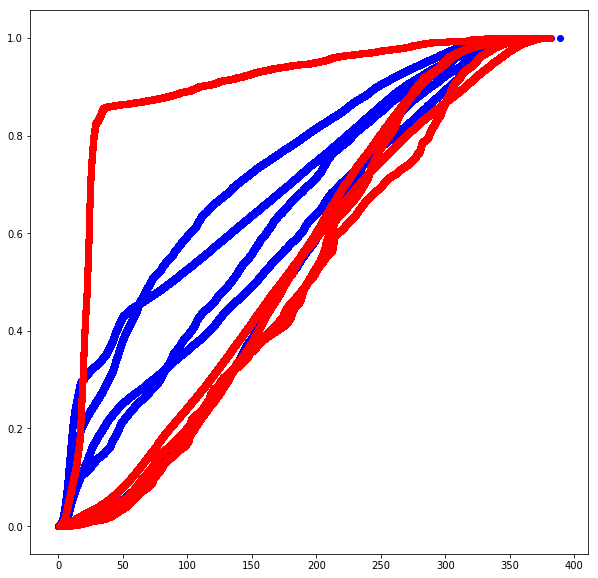

In [19]:
p = bokeh.plotting.figure(plot_width=600,
                          plot_height=400,
                          x_axis_label='distance',
                          y_axis_label='ECDF')

#colors=['Red','Orange','Green','Blue','Purple']
plt.figure(figsize=(10,10))
for i,df in enumerate(df_list):
    if 'beetleabdomen' in df:
        color='red'
    else:
        color='blue'
        
    x_val,y_val=ecdf_func(df['head2head'])
    
    plt.scatter(x_val,y_val,color=color)